### Author- Nikita  Agarwall
#**TIMELINE ANALYSIS - COVID19**
- Creating a storyboard showing spread of Covid-19 cases in your country or any
region (Asia, Europe, BRICS etc) using python


IMPORTING LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline
sns.set()

LOADING DATASET

In [2]:
from google.colab import files
uploaded=files.upload()

Saving covid.csv to covid.csv


READING DATASET


> COLLECTING DATA INFO



In [3]:
df = pd.read_csv('covid.csv')

In [4]:
#print first five row
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
#print last five row
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
73988,ZWE,Africa,Zimbabwe,2021-03-06,36260.0,12.0,28.857,1485.0,1.0,3.143,2439.627,0.807,1.942,99.913,0.067,0.211,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600.0,392499.0,26.408,0.108,1750.0,0.118,0.016,60.6,tests performed,32014.0,32014.0,NaN,689.0,2330.0,0.22,0.22,NaN,157.0,35.19,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73989,ZWE,Africa,Zimbabwe,2021-03-07,36271.0,11.0,26.000,1485.0,0.0,3.143,2440.367,0.740,1.749,99.913,0.000,0.211,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32240.0,32240.0,NaN,226.0,1914.0,0.22,0.22,NaN,129.0,35.19,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73990,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,2441.578,1.211,1.672,100.048,0.135,0.183,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35518.0,35518.0,NaN,3278.0,2009.0,0.24,0.24,NaN,135.0,35.19,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73991,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,2443.731,2.153,1.663,100.182,0.135,0.163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35761.0,35761.0,NaN,243.0,1526.0,0.24,0.24,NaN,103.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73992,ZWE,Africa,Zimbabwe,2021-03-10,36341.0,20.0,23.143,1489.0,0.0,1.571,2445.077,1.346,1.557,100.182,0.000,0.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [6]:
#print random five row
df.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
58451,SRB,Europe,Serbia,2020-11-26,148214.0,7606.0,6302.429,1366.0,51.0,36.571,21781.455,1117.774,926.202,200.747,7.495,5.375,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21569.0,1703985.0,250.417,3.17,18572.0,2.729,0.339,2.9,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.19,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.00,0.806
17048,CYP,Europe,Cyprus,2020-05-10,898.0,6.0,3.714,16.0,1.0,0.143,1025.232,6.850,4.241,18.267,1.142,0.163,0.64,4.0,4.567,20.0,22.834,0.986,1.126,5.918,6.757,1393.0,76030.0,86.802,1.59,1701.0,1.942,0.002,458.0,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.59,875899.0,127.657,37.3,13.416,8.563,32415.132,NaN,141.171,9.24,19.6,52.7,NaN,3.400,80.98,0.887
62670,ESP,Europe,Spain,2020-07-25,272421.0,0.0,1738.000,28432.0,0.0,1.714,5826.591,0.000,37.173,608.109,0.000,0.037,1.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40362.0,0.863,0.043,23.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,46754783.0,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.970,83.56,0.904
56605,WSM,Oceania,Samoa,2020-11-27,2.0,1.0,0.143,NaN,NaN,0.000,10.080,5.040,0.720,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198410.0,69.413,22.0,5.606,3.564,6021.557,NaN,348.977,9.21,16.7,38.1,NaN,NaN,73.32,0.715
7353,BLZ,North America,Belize,2020-05-26,18.0,0.0,0.000,2.0,0.0,0.000,45.269,0.000,0.000,5.030,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.19,397621.0,16.426,25.0,3.853,2.279,7824.362,NaN,176.957,17.11,NaN,NaN,90.083,1.300,74.62,0.716


In [7]:
print(df.info())             #full summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73993 entries, 0 to 73992
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               73993 non-null  object 
 1   continent                              70332 non-null  object 
 2   location                               73993 non-null  object 
 3   date                                   73993 non-null  object 
 4   total_cases                            72923 non-null  float64
 5   new_cases                              72921 non-null  float64
 6   new_cases_smoothed                     71920 non-null  float64
 7   total_deaths                           63734 non-null  float64
 8   new_deaths                             63892 non-null  float64
 9   new_deaths_smoothed                    71920 non-null  float64
 10  total_cases_per_million                72525 non-null  float64
 11  ne

In [8]:
print(df.describe())    #statistical details of the dataset

        total_cases      new_cases  ...  life_expectancy  human_development_index
count  7.292300e+04   72921.000000  ...     70310.000000             68006.000000
mean   6.412495e+05    5145.082761  ...        73.137571                 0.727880
std    4.511605e+06   32219.988755  ...         7.549991                 0.150146
min    1.000000e+00  -74347.000000  ...        53.280000                 0.394000
25%    7.210000e+02       2.000000  ...        67.440000                 0.602000
50%    7.951000e+03      59.000000  ...        74.530000                 0.748000
75%    8.577750e+04     669.000000  ...        78.730000                 0.848000
max    1.180309e+08  879905.000000  ...        86.750000                 0.957000

[8 rows x 54 columns]


In [9]:
print(df.shape)      #shape of dataset

(73993, 59)


In [10]:
duplicate_rows_df = df[df.duplicated()]

print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 59)


In [11]:
df.count() #Used to count the number of rows

iso_code                                 73993
continent                                70332
location                                 73993
date                                     73993
total_cases                              72923
new_cases                                72921
new_cases_smoothed                       71920
total_deaths                             63734
new_deaths                               63892
new_deaths_smoothed                      71920
total_cases_per_million                  72525
new_cases_per_million                    72523
new_cases_smoothed_per_million           71527
total_deaths_per_million                 63349
new_deaths_per_million                   63507
new_deaths_smoothed_per_million          71527
reproduction_rate                        59478
icu_patients                              7639
icu_patients_per_million                  7639
hosp_patients                             9185
hosp_patients_per_million                 9185
weekly_icu_ad

In [12]:

df.isnull().sum()

iso_code                                     0
continent                                 3661
location                                     0
date                                         0
total_cases                               1070
new_cases                                 1072
new_cases_smoothed                        2073
total_deaths                             10259
new_deaths                               10101
new_deaths_smoothed                       2073
total_cases_per_million                   1468
new_cases_per_million                     1470
new_cases_smoothed_per_million            2466
total_deaths_per_million                 10644
new_deaths_per_million                   10486
new_deaths_smoothed_per_million           2466
reproduction_rate                        14515
icu_patients                             66354
icu_patients_per_million                 66354
hosp_patients                            64808
hosp_patients_per_million                64808
weekly_icu_ad

In [13]:
df1=df[["date","total_cases","new_cases","total_deaths","new_tests","total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,1.0,1.0,NaN,NaN,NaN
1,2020-02-25,1.0,0.0,NaN,NaN,NaN
2,2020-02-26,1.0,0.0,NaN,NaN,NaN
3,2020-02-27,1.0,0.0,NaN,NaN,NaN
4,2020-02-28,1.0,0.0,NaN,NaN,NaN


In [14]:
df1.mean()

total_cases     6.412495e+05
new_cases       5.145083e+03
total_deaths    1.907216e+04
new_tests       3.772129e+04
total_tests     4.577096e+06
dtype: float64

In [15]:
df1.cov()

,total_cases,new_cases,total_deaths,new_tests,total_tests
total_cases,2.035458e+13,1.276324e+11,5.276639e+11,1.899429e+11,3.174457e+13
new_cases,1.276324e+11,1.038128e+09,3.443579e+09,1.551443e+09,1.993430e+11
total_deaths,5.276639e+11,3.443579e+09,1.243519e+10,3.887862e+09,6.101671e+11
new_tests,1.899429e+11,1.551443e+09,3.887862e+09,2.165097e+10,2.847797e+12
total_tests,3.174457e+13,1.993430e+11,6.101671e+11,2.847797e+12,4.564719e+14


In [16]:
df1.corr()

,total_cases,new_cases,total_deaths,new_tests,total_tests
total_cases,1.000000,0.877950,0.981928,0.835360,0.959608
new_cases,0.877950,1.000000,0.897627,0.858907,0.762061
total_deaths,0.981928,0.897627,1.000000,0.818567,0.879227
new_tests,0.835360,0.858907,0.818567,1.000000,0.873148
total_tests,0.959608,0.762061,0.879227,0.873148,1.000000


VISUALISE THE CORREALATION MATRIX

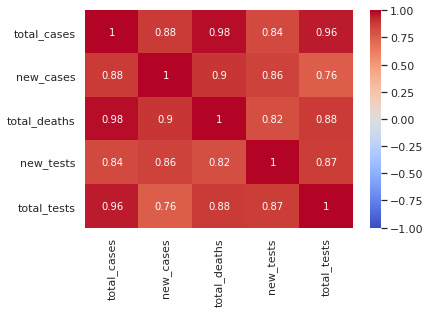

In [17]:
sns.heatmap(df1.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [18]:
df1.var()

total_cases     2.035458e+13
new_cases       1.038128e+09
total_deaths    1.243519e+10
new_tests       2.165097e+10
total_tests     4.564719e+14
dtype: float64

In [19]:
df1.std()

total_cases     4.511605e+06
new_cases       3.221999e+04
total_deaths    1.115132e+05
new_tests       1.471427e+05
total_tests     2.136520e+07
dtype: float64

PROPER VISUALISATION OF DATASET

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


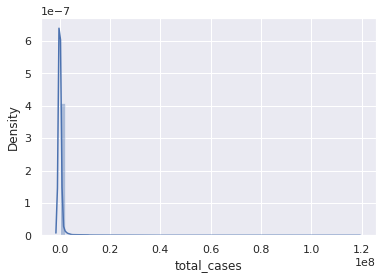

In [26]:
sns.distplot(df1['total_cases'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


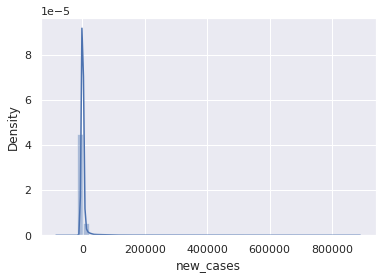

In [27]:
sns.distplot(df1['new_cases']);

Text(0.5, 0, 'MONTH')

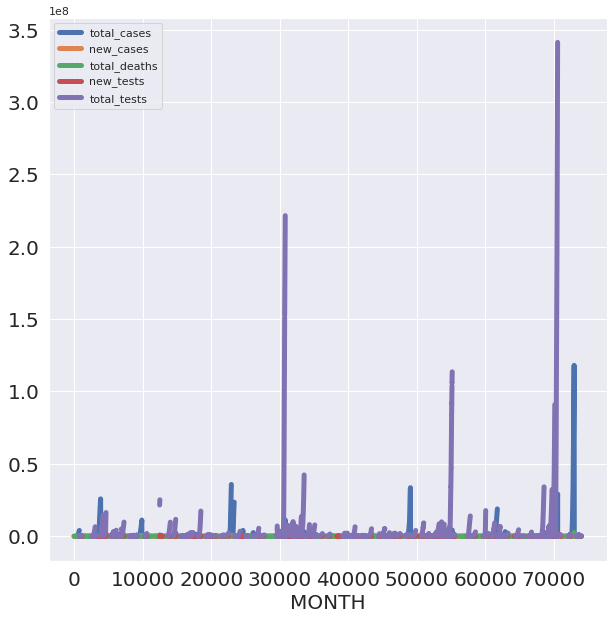

In [24]:
df1.plot(figsize = (10 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('MONTH', fontsize = 20)

Text(0.5, 0, 'TOTAL CASES')

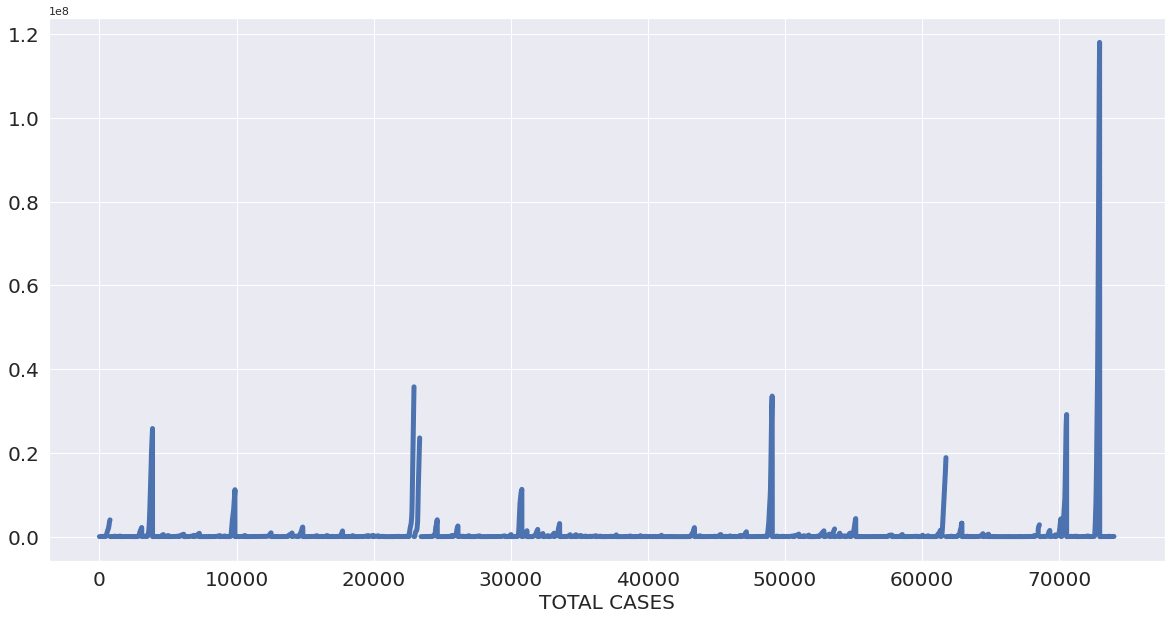

In [28]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('TOTAL CASES', fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


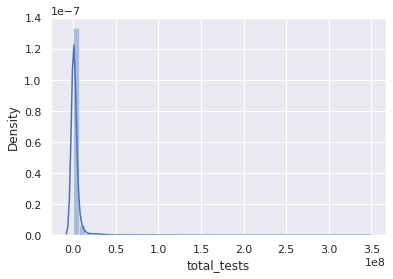

In [29]:
sns.distplot(df1['total_tests'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


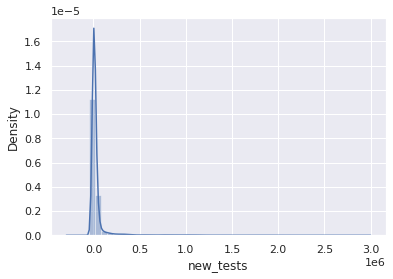

In [30]:
sns.distplot(df1['new_tests']);

Text(0.5, 0, 'Month')

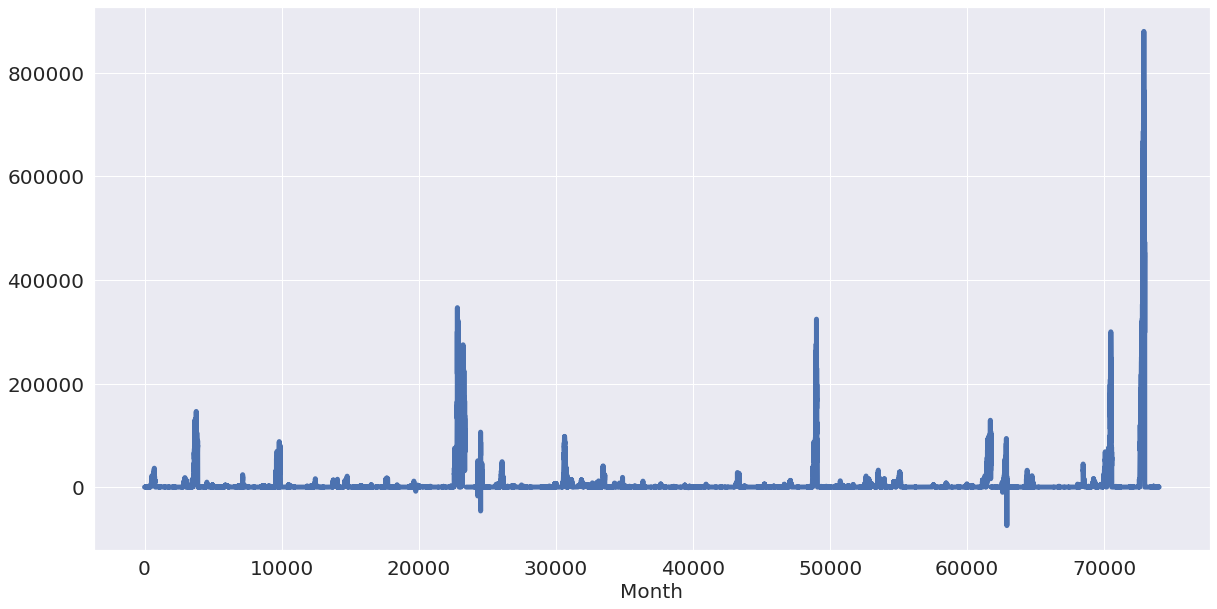

In [31]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

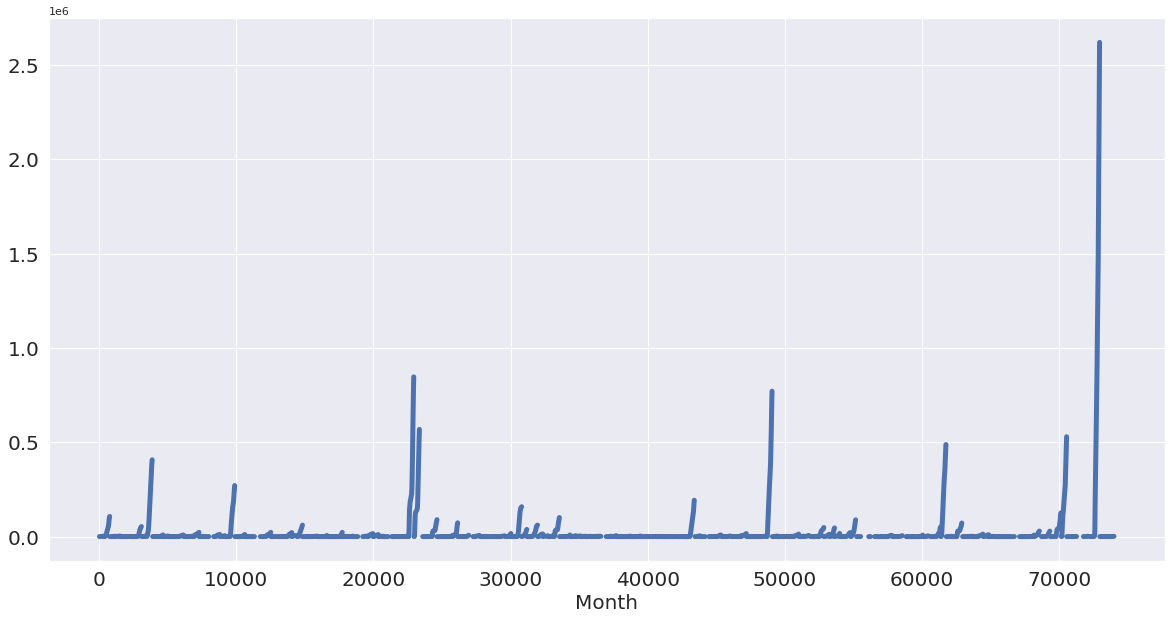

In [32]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

TRENDS IN TIMESERIES DATASET

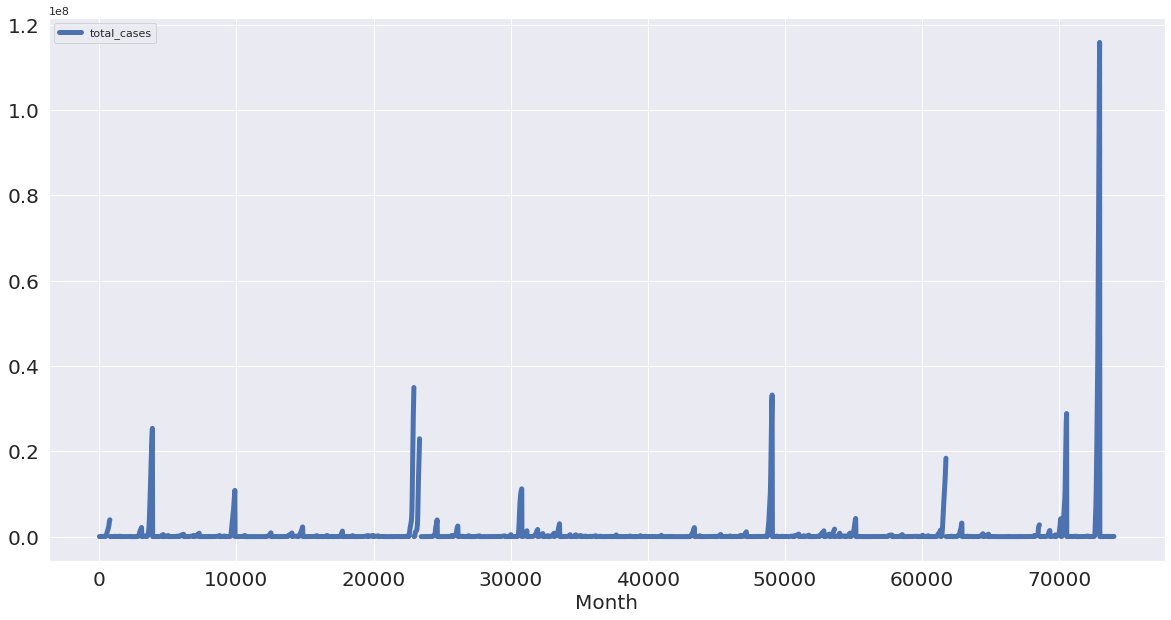

In [33]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

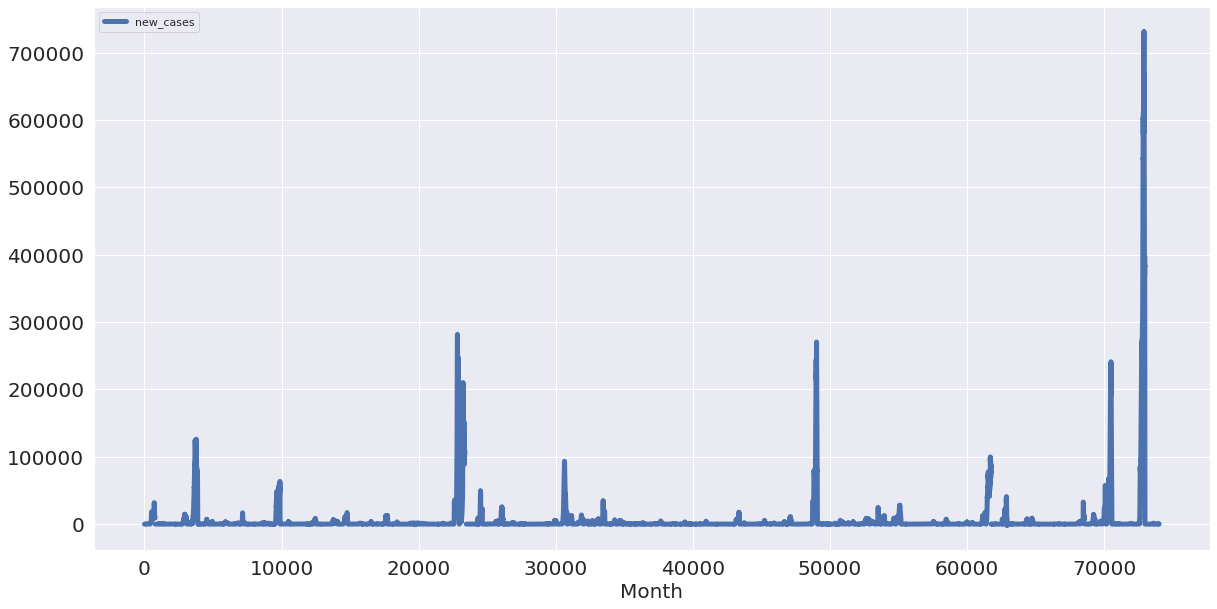

In [34]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


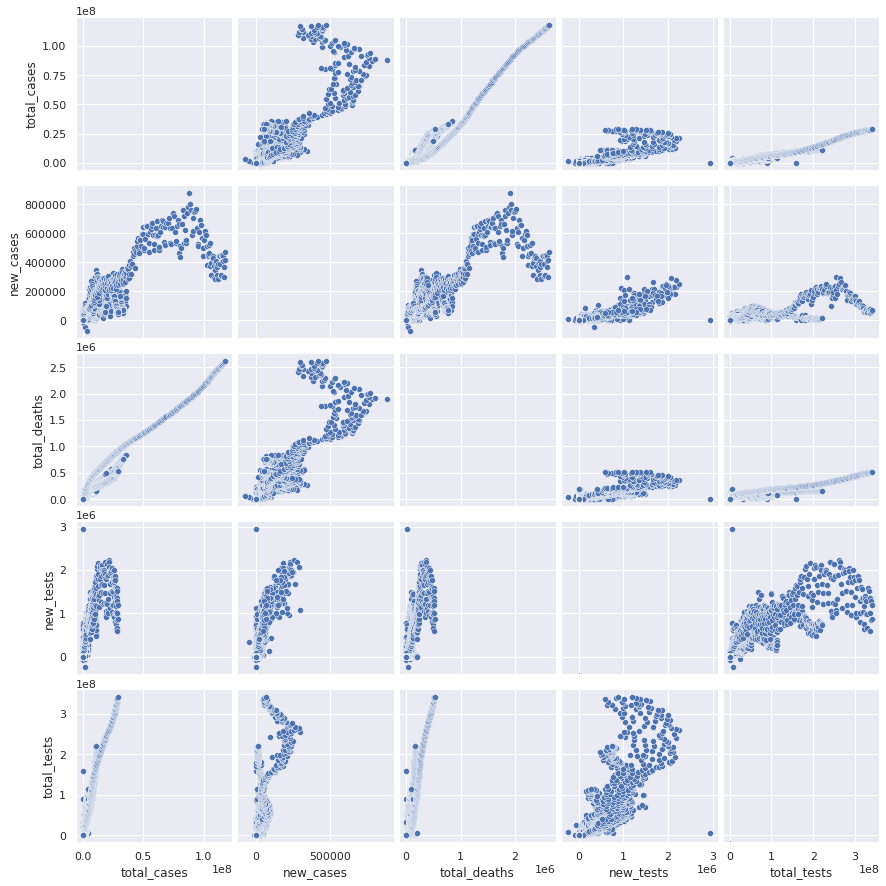

In [35]:
sns.pairplot(df1, size=2.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


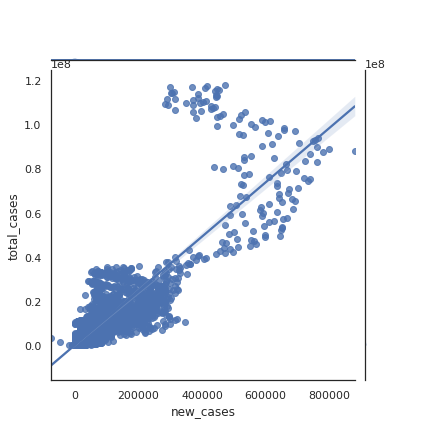

In [36]:
with sns.axes_style('white'):
    sns.jointplot("new_cases", "total_cases", data=df1, kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


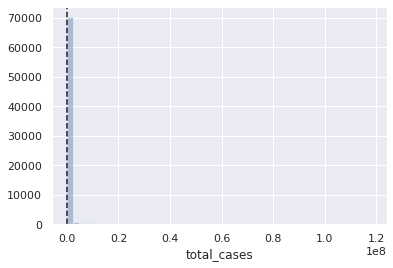

In [37]:
sns.distplot(df1['total_cases'], kde=False);
plt.axvline(0, color="k", linestyle="--");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


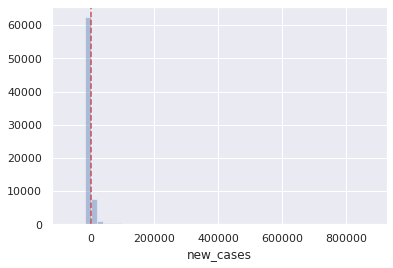

In [38]:
sns.distplot(df1['new_cases'], kde=False);
plt.axvline(0, color="r", linestyle="--");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


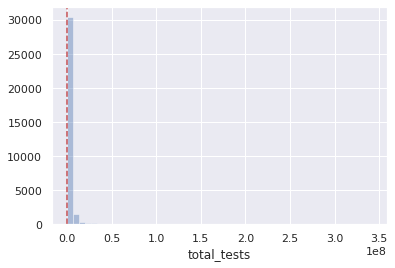

In [39]:
sns.distplot(df1['total_tests'], kde=False);
plt.axvline(0, color="r", linestyle="--");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


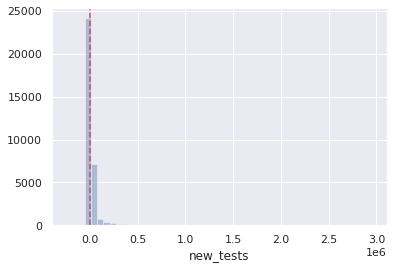

In [40]:
sns.distplot(df1['new_tests'], kde=False);
plt.axvline(0, color="r", linestyle="--");

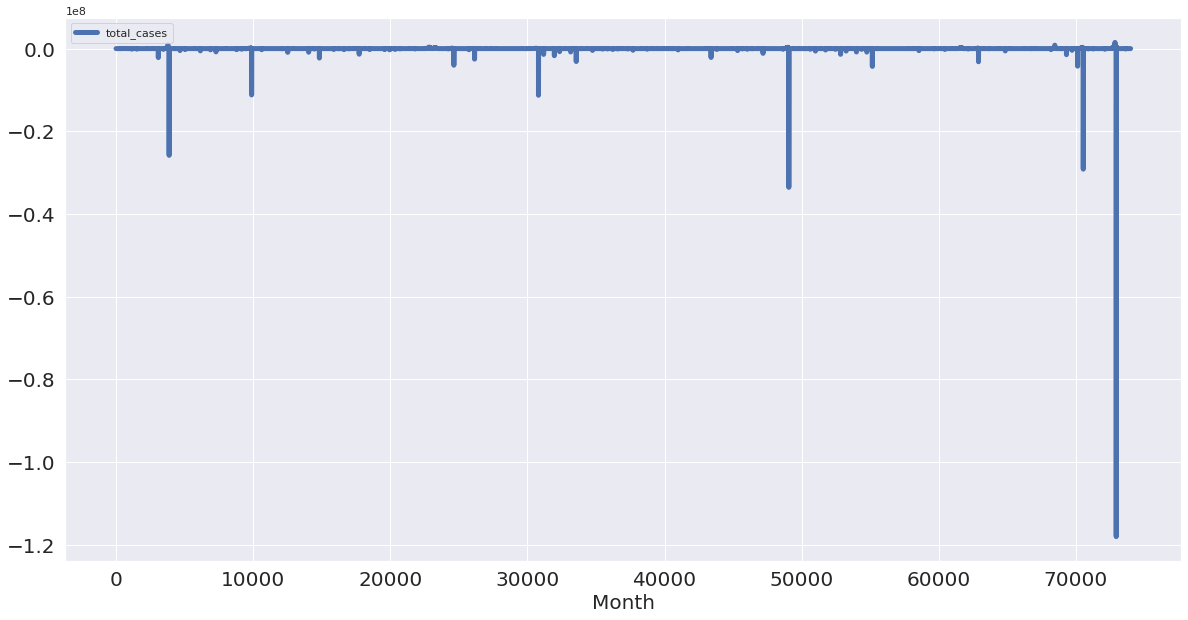

In [43]:
total_cases.diff().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20);

Text(0.5, 0, 'Month')

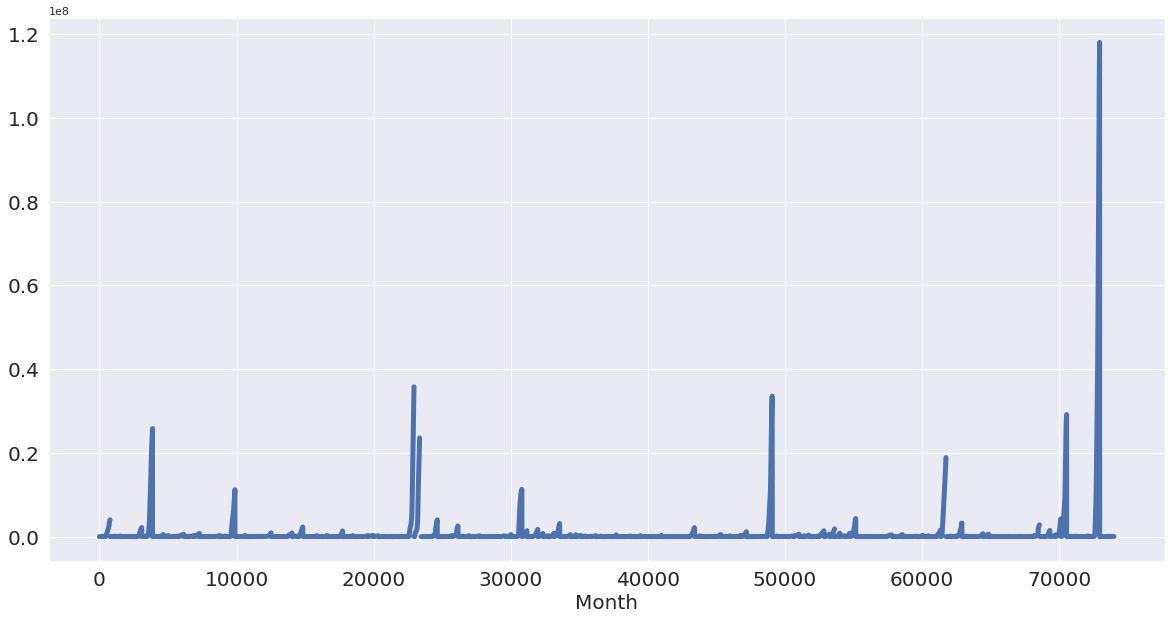

In [41]:
df1.total_cases.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel("Month",fontsize=20)

Text(0.5, 0, 'CASES')

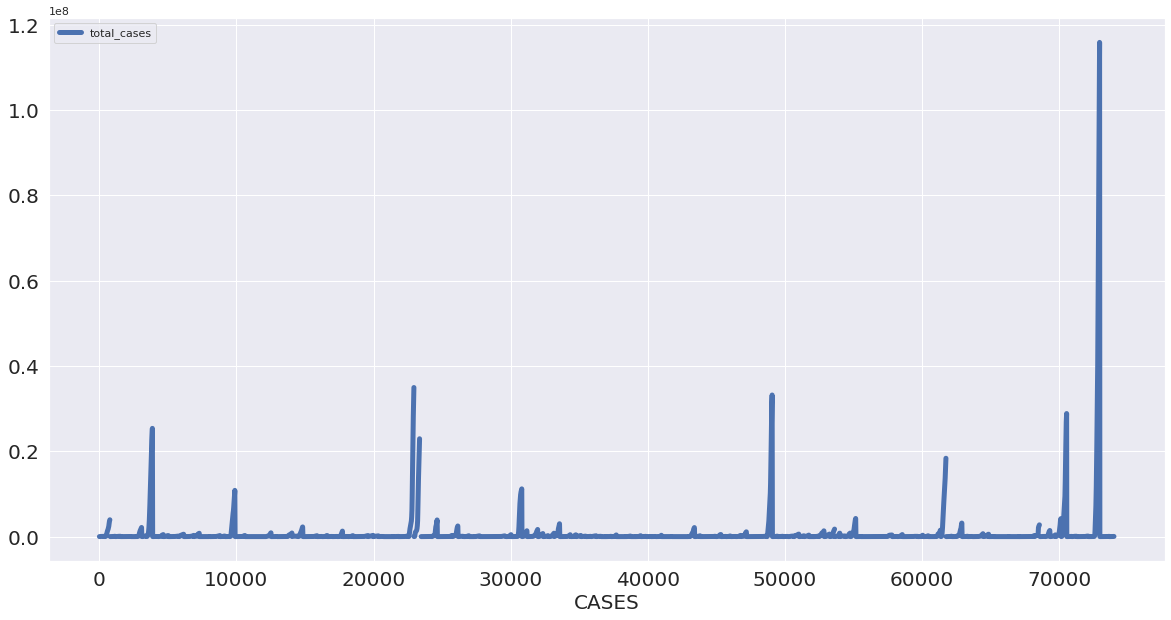

In [42]:
total_cases=df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel("CASES",fontsize=20)

##TASK ACCOMPLISHED


> THANK YOU!😀



